In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
imdb=pd.read_csv("tmdb-movies.csv")
imdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [161]:
imdb.shape

(10866, 21)

In [162]:
imdb.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [163]:
imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

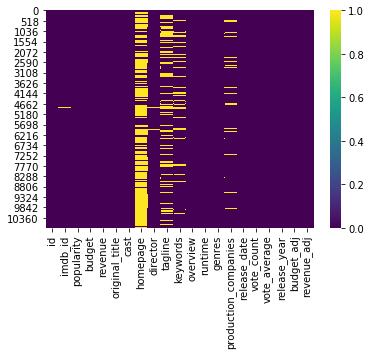

In [164]:
sns.heatmap(imdb.isnull(),cmap='viridis')

In [165]:
imdb.columns.tolist()

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [4]:
dimdb=imdb.drop(['homepage','keywords','overview','vote_count','tagline','imdb_id','budget_adj','revenue_adj'],axis='columns')

In [168]:
dimdb.shape

(10866, 13)

In [169]:
dimdb.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EC3E978548>,
      dtype=object)

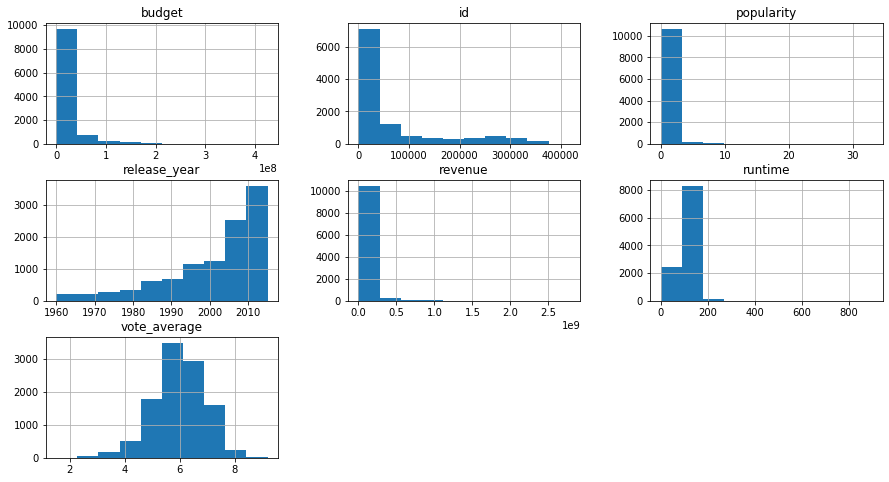

In [170]:
dimdb.hist(figsize=(15,8))

In [221]:
dimdb.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

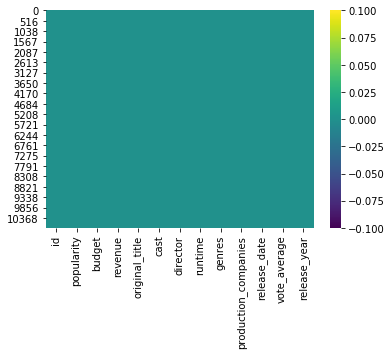

In [193]:
sns.heatmap(dimdb.isnull(),cmap='viridis')

In [9]:
dimdb.production_companies.count()

10439

In [5]:
dimdb.drop_duplicates(subset='original_title',inplace=True)

In [6]:
dimdb=dimdb.dropna(subset=['cast','director','genres'],how='any')

In [7]:
dimdb=dimdb.fillna({'production_companies':'various'})

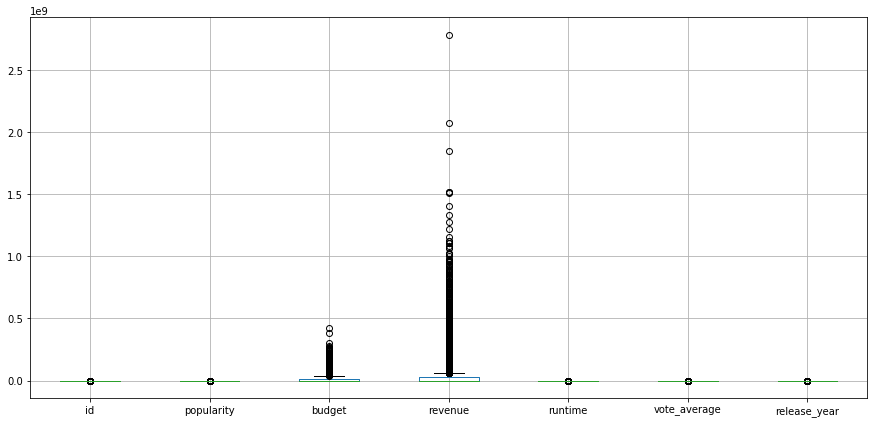

In [181]:
dimdb.boxplot(figsize=(15,7))

In [70]:
dimdb.shape

(10439, 13)

In [10]:
print(dimdb.budget.max())
Max=dimdb.budget.quantile(0.999)
Max

425000000


250000000.0

In [11]:
dimdb=dimdb[dimdb.budget<Max]
dimdb.shape

(10423, 13)

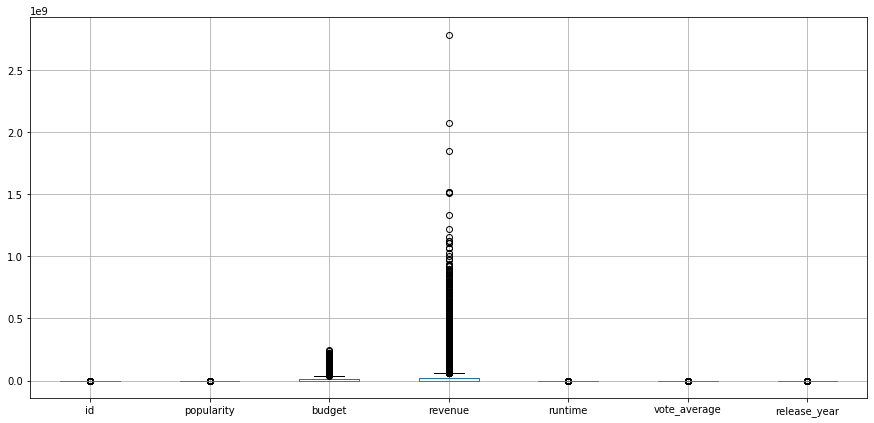

In [13]:
dimdb.boxplot(figsize=(15,7))

In [13]:
#question 5;
dimdb[dimdb.release_year == 2006].runtime.mean()

102.45685279187818

In [98]:
#question 1;
dimdb1=dimdb[['original_title','budget']]
dimdb1=dimdb1.sort_values(by=['budget'],ascending=False)
dimdb1=dimdb1[dimdb1.budget>=5000]
dimdb1=dimdb1.loc[[2,7044]]
dimdb1

,original_title,budget
2,Insurgent,110000000
7044,Primer,7000


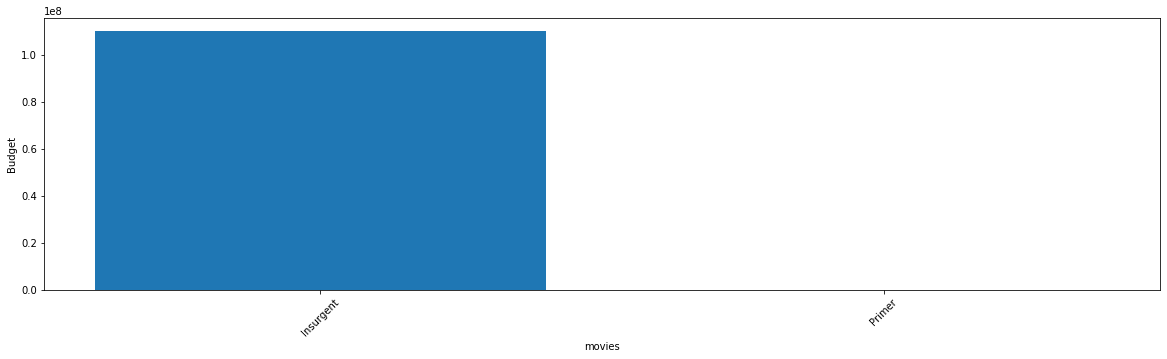

In [99]:
arr=np.arange(len(dimdb1.original_title))
plt.figure(figsize=(20,5))
plt.xticks(arr,dimdb1.original_title)
plt.xlabel('movies')
plt.ylabel('Budget')
plt.bar(arr,dimdb1.budget)
plt.xticks(rotation=45)
plt.show()

In [100]:
#question 4
dimdb4=dimdb[['original_title','revenue']]
dimdb4=dimdb4.sort_values(by=['revenue'],ascending=False)
dimdb4[(dimdb4.revenue>=dimdb4.revenue.quantile(0.75)) | (dimdb4.revenue<=dimdb4.revenue.quantile(0.25))]

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
...,...,...
4549,Io e te,0
4548,Much Ado About Nothing,0
4546,Radio Rebel,0
4545,So Undercover,0


In [168]:
#question 6
dimdb6=dimdb[['production_companies','revenue','original_title']]
imdb61=pd.DataFrame(dimdb6["production_companies"].str.replace("|"," "))
dimdb6=dimdb6.drop('production_companies',axis='columns')
dimdb6["production_companies"]=dimdb61["production_companies"].to_list()
dimdb6=dimdb6.sort_values(by=['revenue'],ascending=False)
dimdb6.tail(3)

,revenue,original_title,production_companies
4546,0,Radio Rebel,Two 4 The Money Media
4545,0,So Undercover,Crystal City Entertainment Exclusive Media Gro...
10865,0,Manos: The Hands of Fate,Norm-Iris


In [126]:
dimdb6[dimdb6["production_companies"].str.contains('Universal Studios Amblin')]

,revenue,original_title,production_companies
0,1513528810,Jurassic World,Universal Studios Amblin Entertainment Legenda...
2820,368780809,Jurassic Park III,Universal Studios Amblin Entertainment
10356,9317021,We're Back! A Dinosaur's Story,Universal Studios Amblin Entertainment Amblima...


In [186]:
#question 3
dimdb3=dimdb[['cast','genres']]
dimdb31=pd.DataFrame(dimdb3["cast"].str.replace("|"," "))
dimdb3=dimdb3.drop('cast',axis='columns')
dimdb3["cast"]=dimdb31["cast"].to_list()
dimdb3EW=dimdb3[dimdb3["cast"].str.contains('Emma Watson')]
dimdb3VD=dimdb3[dimdb3["cast"].str.contains('Vin Diesel')]
dimdb3EW

,genres,cast
146,Horror|Mystery|Thriller,Ethan Hawke Emma Watson Aaron Ashmore Devon Bo...
686,Drama|Adventure,Russell Crowe Jennifer Connelly Emma Watson Lo...
2634,Adventure|Fantasy|Family,Daniel Radcliffe Rupert Grint Emma Watson John...
3020,Animation|Comedy|Family,Matthew Broderick Dustin Hoffman Emma Watson T...
3374,Adventure|Family|Fantasy,Daniel Radcliffe Rupert Grint Emma Watson Alan...
3912,Adventure|Fantasy|Family,Daniel Radcliffe Rupert Grint Emma Watson Kenn...
4388,Drama|Romance,Logan Lerman Emma Watson Ezra Miller Paul Rudd...
6190,Adventure|Fantasy|Family,Daniel Radcliffe Rupert Grint Emma Watson Ralp...
6962,Adventure|Fantasy|Family,Daniel Radcliffe Rupert Grint Emma Watson Gary...
7388,Adventure|Fantasy|Family|Mystery,Daniel Radcliffe Rupert Grint Emma Watson Mich...


In [187]:
dimdb3VD

,genres,cast
4,Action|Crime|Thriller,Vin Diesel Paul Walker Jason Statham Michelle ...
41,Fantasy|Action|Adventure,Vin Diesel Rose Leslie Michael Caine Elijah Wo...
630,Action|Science Fiction|Adventure,Chris Pratt Zoe Saldana Dave Bautista Vin Dies...
1539,Action|Crime|Drama|Thriller,Vin Diesel Paul Walker Jordana Brewster Michel...
1907,Action|Drama,Vin Diesel Michelle Rodriguez Sung Kang Don Om...
2438,Adventure|Animation|Family|Fantasy|Science Fic...,Jennifer Aniston Harry Connick Jr. Vin Diesel ...
2753,Action|Crime|Thriller,Paul Walker Vin Diesel Michelle Rodriguez Jord...
2766,Crime|Thriller,Barry Pepper Andy Davoli Seth Green Vin Diesel...
2942,Action|Adventure|Science Fiction|Thriller,Vin Diesel Michelle Yeoh MÃ©lanie Thierry Lamb...
3619,Action|Thriller|Crime,Vin Diesel Paul Walker Dwayne Johnson Jordana ...


In [219]:
genres_VD=dimdb3VD['genres'].str.get_dummies().add_prefix('genre_')
genres_VD=genres_VD.sum()
print(genres_VD)
genres_VD.max()

genre_Action             19
genre_Adventure           5
genre_Animation           3
genre_Comedy              2
genre_Crime               8
genre_Drama               6
genre_Family              2
genre_Fantasy             2
genre_Science Fiction     8
genre_Thriller           13
dtype: int64


19

In [218]:
genres_EW=dimdb3EW['genres'].str.get_dummies().add_prefix('genre_')
genres_EWs=genres_EW.sum()
print(genres_EWs)
genres_EWs.max()

genre_Adventure    7
genre_Animation    1
genre_Comedy       1
genre_Drama        3
genre_Family       8
genre_Fantasy      6
genre_Horror       1
genre_Mystery      2
genre_Romance      1
genre_Thriller     1
dtype: int64


8